In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler

import tensorflow as tf
from tensorflow.keras import layers, models

SEED_VALUE=123


# Read Dataset + EDA

In [ ]:
df = pd.read_parquet("2A.parquet")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country,id
0,2014-05-09 00:00:00,376000.0,3.0,2.00,1340,1384,3.0,0,slums,3,1340,0,2008,0,Seattle,WA 98103,USA,1
1,2014-05-09 00:00:00,800000.0,4.0,3.25,3540,159430,2.0,0,slums,3,3540,0,2007,0,Carnation,WA 98014,USA,2
2,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,slums,3,6420,850,2010,0,Issaquah,WA 98029,USA,3
3,2014-05-09 00:00:00,324000.0,3.0,2.25,998,904,2.0,0,slums,3,798,200,2007,0,Seattle,WA 98117,USA,4
4,2014-05-10 00:00:00,549900.0,5.0,2.75,3060,7015,1.0,0,slums,5,1600,1460,1979,0,Seattle,WA 98146,USA,5


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4140 non-null   object 
 1   price          4139 non-null   float64
 2   bedrooms       4140 non-null   float64
 3   bathrooms      4140 non-null   float64
 4   sqft_living    4140 non-null   int64  
 5   sqft_lot       4140 non-null   int64  
 6   floors         4140 non-null   object 
 7   waterfront     4140 non-null   int64  
 8   view           4140 non-null   object 
 9   condition      4140 non-null   int64  
 10  sqft_above     4140 non-null   int64  
 11  sqft_basement  4140 non-null   int64  
 12  yr_built       4140 non-null   int64  
 13  yr_renovated   4140 non-null   int64  
 14  city           4140 non-null   object 
 15  statezip       4140 non-null   object 
 16  country        4140 non-null   object 
 17  id             4140 non-null   int64  
dtypes: float

Found null value at price column, Solution : Delete that row since its only a single row that is null

In [ ]:
df[df.isnull().any(axis=1)]

# Since there is only one row that has a null value, let's just delete that row

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country,id
322,2014-05-16 00:00:00,NaN,2.0,1.5,1070,9643,1.0,0,slums,3,1070,0,1985,0,Kent,WA 98030,USA,323


In [ ]:
df = df.dropna(subset=["price"])


In [ ]:
print(df.info())

#null value is fixed


<class 'pandas.core.frame.DataFrame'>
Index: 4139 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4139 non-null   object 
 1   price          4139 non-null   float64
 2   bedrooms       4139 non-null   float64
 3   bathrooms      4139 non-null   float64
 4   sqft_living    4139 non-null   int64  
 5   sqft_lot       4139 non-null   int64  
 6   floors         4139 non-null   object 
 7   waterfront     4139 non-null   int64  
 8   view           4139 non-null   object 
 9   condition      4139 non-null   int64  
 10  sqft_above     4139 non-null   int64  
 11  sqft_basement  4139 non-null   int64  
 12  yr_built       4139 non-null   int64  
 13  yr_renovated   4139 non-null   int64  
 14  city           4139 non-null   object 
 15  statezip       4139 non-null   object 
 16  country        4139 non-null   object 
 17  id             4139 non-null   int64  
dtypes: float64(3)

In [ ]:
df.duplicated().sum()

#no duplicate value

np.int64(0)

In [ ]:
df.info()

#dtype object need to be fixed

<class 'pandas.core.frame.DataFrame'>
Index: 4139 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4139 non-null   object 
 1   price          4139 non-null   float64
 2   bedrooms       4139 non-null   float64
 3   bathrooms      4139 non-null   float64
 4   sqft_living    4139 non-null   int64  
 5   sqft_lot       4139 non-null   int64  
 6   floors         4139 non-null   object 
 7   waterfront     4139 non-null   int64  
 8   view           4139 non-null   object 
 9   condition      4139 non-null   int64  
 10  sqft_above     4139 non-null   int64  
 11  sqft_basement  4139 non-null   int64  
 12  yr_built       4139 non-null   int64  
 13  yr_renovated   4139 non-null   int64  
 14  city           4139 non-null   object 
 15  statezip       4139 non-null   object 
 16  country        4139 non-null   object 
 17  id             4139 non-null   int64  
dtypes: float64(3)

In [ ]:
# for id

# we dont need id for predicting price
df.drop(columns=['id'], inplace=True)

In [ ]:
#for floor
df["floors"].unique() #two is a string, lets change it to float 2.0
df["floors"] = df["floors"].replace("two", "2.0")
df["floors"] = df["floors"].astype(float)
df['floors'].unique()

#for view
df['view'].unique() # do one hot encoding
df["view"] = df["view"].str.replace(" ", "_")
df = pd.get_dummies(df, columns=["view"], drop_first=True)


# for city
city_mean = df.groupby("city")["price"].mean()
df["city_encoded"] = df["city"].map(city_mean)
df = df.drop(columns=["city"])


# for statezip
df['statezip'].unique() #sine every statezip is in WA lets just get the number beside it
df["zip_code"] = df["statezip"].str.split().str[1].astype(int)
df = df.drop(columns=["statezip"])

zip_mean = df.groupby('zip_code')['price'].mean()
df['zip_code_encoded'] = df['zip_code'].map(zip_mean)
df.drop(columns=['zip_code'], inplace=True)



# for country
df['country'].unique() #only USA here let's just drop it
df = df.drop(columns=["country"])



In [ ]:
# for date

df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

df['year'].unique() # only has 2014 lets just drop it
df.drop(columns=['year'], inplace=True)

df['month'].unique() # only have [5, 6, 7]
df.drop(columns=['month'], inplace=True)

df['day'].unique() # day doesnt really do much for price
df.drop(columns=['day'], inplace=True)
df.drop(columns=['date'], inplace=True) # removing the rest



In [ ]:
df['age'] = 2014 - df['yr_built'] #dataset is 2014 years old
df.drop(columns=['yr_built'], inplace=True)


In [ ]:
df['age'].unique()

array([  6,   7,   4,  35,  11,  93,  52,   8, 112,  13,  19,   0,  61,
        10,  62,  73,  86,  28,  36, 104,  39,  24, 108,  14,  63,  27,
        71,  60,  48,  15,  53,  34,   1,  58,  46,  45,  59,  25,  92,
        97,  55,  84,   5,  96,  51,  78,  69,  22,  50,  38,  95, 103,
         2,   9,  21,  37,  42,  33,  20,  57,  56,  47,  72,  87,  44,
        91,  75,  67,  83,  41,  70, 105, 109,  32,  89,  77,  64,  12,
        85,  30,  40,  16,  66,  49, 110,  88, 111,  90,  23,  26,  74,
        17,  65,  68,  31,  82, 102,  29,  18,  54, 114,  94, 113, 107,
       106, 100,   3,  99,  76,  98,  79, 101,  43,  81,  80])

In [ ]:
# Fixing Year Renovated

df['yr_renovated'].unique()

df['years_since_renovated'] = 2014 - df['yr_renovated']

df.loc[df['yr_renovated'] == 0, 'years_since_renovated'] = df.loc[df['yr_renovated'] == 0, 'age']

df.drop(columns=['yr_renovated'], inplace=True)
df['years_since_renovated'].unique()

array([  6,   7,   4,  35,  11,   8, 112,  13,  19,   0,  61,  62,  73,
        86,  28,  36,  39,  44,   5,  24,  14,  20,  71,  31,  48,  15,
        34,  91,  58,  46,  45, 104,  25,  17,  97,  84,  52,  96,  51,
        78,  69,  22,  50,  38,  33, 102,   9,  21,  10,  42,  30,   3,
        27,  32,  87,  12,  55,  37,   2,  83,   1,  47,  63,  70, 109,
        41,  77,  26,  93,  56,  85,  40,  16,  49, 110,  88, 111,  23,
        29,  68,  82,  43,  18,  60, 113, 108,  74, 107, 106,  66,  99,
        75,  57,  92,  76,  94,  98,  72,  65,  64,  80,  59,  90,  89,
        81,  79,  67,  53,  54, 114, 101])

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64'])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_cols < (Q1 - 1.5*IQR)) | (numeric_cols > (Q3 + 1.5*IQR)))

outliers.sum()


,0
price,215
bedrooms,110
bathrooms,128
sqft_living,123
sqft_lot,480
floors,0
waterfront,31
condition,5
sqft_above,104
sqft_basement,79


In [ ]:
for col in ['price','bedrooms','bathrooms','sqft_living','sqft_lot',
            'waterfront','condition','sqft_above','sqft_basement',
            'years_since_renovated']:

    idx = df[outliers[col]].index
    print("\nOutliers For Column :", col)
    display(df.loc[idx].head())



Outliers For Column : price


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,6420,850,False,False,False,True,5.999501e+05,6.201392e+05,4,4
11,1225000.0,4.0,4.50,5420,101930,1.0,0,3,3890,1530,False,False,False,True,6.629162e+05,6.882318e+05,13,13
18,1200000.0,3.0,1.75,1560,8078,1.5,1,4,1560,0,False,True,False,False,1.111306e+06,1.111306e+06,86,86
22,1575000.0,5.0,2.75,3650,20150,1.0,0,4,2360,1290,False,False,False,True,8.616365e+05,1.333924e+06,39,39
28,1315000.0,4.0,3.50,3460,3997,2.0,0,3,2560,900,False,False,False,True,5.776812e+05,5.904518e+05,10,11



Outliers For Column : bedrooms


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
17,235000.0,1.0,1.0,810,2451,1.0,0,5,810,0,False,False,False,True,577681.23112,422517.453552,73,73
80,635000.0,-3.0,2.5,1570,1433,3.0,0,3,1570,0,False,False,False,True,577681.23112,590451.829241,4,4
107,799200.0,6.0,3.0,2890,2370,2.5,0,3,2290,600,False,False,False,True,577681.23112,733301.428571,108,0
115,550000.0,7.0,4.0,3440,8100,2.0,0,3,3440,0,False,False,False,True,577681.23112,590451.829241,44,0
283,475000.0,7.0,3.5,2870,29699,1.0,0,3,1520,1350,False,False,False,True,577681.23112,450707.407407,53,10



Outliers For Column : bathrooms


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,6420,850,False,False,False,True,599950.091221,6.201392e+05,4,4
11,1225000.0,4.0,4.50,5420,101930,1.0,0,3,3890,1530,False,False,False,True,662916.232888,6.882318e+05,13,13
77,1264000.0,4.0,3.75,3490,9170,2.0,0,3,3490,0,False,False,False,True,861636.498526,1.333924e+06,2,102
83,1050000.0,4.0,3.75,3280,11000,2.0,0,3,2320,960,False,False,False,True,658193.859559,8.200631e+05,6,6
88,480000.0,5.0,4.75,3830,35000,1.0,0,3,2130,1700,False,False,False,True,606881.820388,6.541838e+05,38,38



Outliers For Column : sqft_living


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,6420,850,False,False,False,True,599950.091221,620139.192412,4,4
11,1225000.0,4.0,4.50,5420,101930,1.0,0,3,3890,1530,False,False,False,True,662916.232888,688231.822517,13,13
20,900000.0,4.0,3.25,4700,38412,2.0,0,3,3420,1280,False,False,False,True,861636.498526,783503.567901,36,36
35,950000.0,5.0,3.00,4530,258746,1.5,0,4,3200,1330,False,False,False,True,606881.820388,654183.806818,11,11
118,1050000.0,4.0,3.25,4400,16625,2.0,0,3,4400,0,False,False,False,True,677730.867836,746975.125152,11,11



Outliers For Column : sqft_lot


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
1,800000.0,4.0,3.25,3540,159430,2.0,0,3,3540,0,False,False,False,True,530085.722222,530085.722222,7,7
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,6420,850,False,False,False,True,599950.091221,620139.192412,4,4
11,1225000.0,4.0,4.50,5420,101930,1.0,0,3,3890,1530,False,False,False,True,662916.232888,688231.822517,13,13
19,560000.0,3.0,2.00,2560,216777,1.0,0,3,2560,0,False,False,False,True,296657.209424,357405.450164,28,28
20,900000.0,4.0,3.25,4700,38412,2.0,0,3,3420,1280,False,False,False,True,861636.498526,783503.567901,36,36



Outliers For Column : waterfront


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
18,1200000.0,3.0,1.75,1560,8078,1.5,1,4,1560,0,False,True,False,False,1.111306e+06,1.111306e+06,86,86
58,947500.0,3.0,2.75,2980,27144,1.5,1,5,2180,800,True,False,False,False,3.472249e+05,4.312233e+05,97,97
75,615000.0,2.0,1.75,2040,28593,1.5,1,4,2040,0,False,False,False,False,4.803268e+05,4.803268e+05,95,24
121,2555000.0,4.0,2.50,5300,26211,2.0,1,2,4570,730,True,False,False,False,5.776812e+05,9.021421e+05,91,91
703,503000.0,2.0,1.75,2860,59612,1.0,1,3,1510,1350,False,True,False,False,2.878132e+05,2.829111e+05,66,11



Outliers For Column : condition


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
962,550000.0,4.0,1.0,1660,34848,1.0,0,1,930,730,False,False,False,True,662916.232888,6.437277e+05,81,81
1877,427000.0,4.0,1.0,1860,4736,1.5,0,1,1860,0,False,False,False,True,577681.231120,1.032789e+06,113,113
2574,365000.0,4.0,2.0,1940,25600,1.0,0,1,1940,0,False,False,False,True,861636.498526,8.000957e+05,52,52
3218,235000.0,2.0,1.0,900,28800,1.0,0,1,900,0,False,False,False,True,539902.707692,5.399027e+05,86,86
3891,7800.0,2.0,1.0,780,16344,1.0,0,1,780,0,False,False,False,True,311121.857143,2.543864e+05,72,72



Outliers For Column : sqft_above


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,6420,850,False,False,False,True,599950.091221,620139.192412,4,4
118,1050000.0,4.0,3.25,4400,16625,2.0,0,3,4400,0,False,False,False,True,677730.867836,746975.125152,11,11
121,2555000.0,4.0,2.50,5300,26211,2.0,1,2,4570,730,True,False,False,False,577681.231120,902142.108333,91,91
174,740000.0,5.0,5.00,5774,31675,1.0,0,3,4490,1284,True,False,False,False,287813.207561,301545.000000,30,30
215,1120000.0,4.0,2.25,4470,60373,2.0,0,3,4470,0,False,False,False,True,606881.820388,571605.762712,26,14



Outliers For Column : sqft_basement


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
11,1225000.0,4.0,4.50,5420,101930,1.0,0,3,3890,1530,False,False,False,True,6.629162e+05,6.882318e+05,13,13
65,1346400.0,5.0,1.75,3380,20021,1.0,0,4,1690,1690,False,False,False,True,1.343140e+06,1.333924e+06,51,51
88,480000.0,5.0,4.75,3830,35000,1.0,0,3,2130,1700,False,False,False,True,6.068818e+05,6.541838e+05,38,38
117,464000.0,5.0,2.50,3400,8970,1.0,0,4,1700,1700,False,False,False,True,4.196590e+05,3.773920e+05,55,55
135,675000.0,5.0,3.00,3410,9600,1.0,0,4,1870,1540,False,False,False,True,6.629162e+05,6.437277e+05,46,46



Outliers For Column : years_since_renovated


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
9,842500.0,4.0,2.50,2160,5298,2.5,0,4,2160,0,False,False,False,True,577681.231120,5.690063e+05,112,112
43,330000.0,5.0,3.00,2100,7715,1.0,0,3,1250,850,False,False,False,True,347224.943576,2.543864e+05,1,91
51,870300.0,4.0,2.50,2350,3150,1.5,0,4,1690,660,False,False,False,True,577681.231120,5.904518e+05,104,104
58,947500.0,3.0,2.75,2980,27144,1.5,1,5,2180,800,True,False,False,False,347224.943576,4.312233e+05,97,97
64,1300000.0,4.0,3.25,2330,9687,2.0,0,3,2330,0,False,False,False,False,577681.231120,1.032789e+06,96,96


Bedroom value exist negative, lets remove that (Input Error)

In [ ]:
df = df[df['bedrooms'] >= 0]


Other Outliers seems normal, checking Sqft_lot because the value seems very massive

In [ ]:
df.loc[df['sqft_lot'] > 500000]


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
618,542500.0,5.0,3.25,3010,1074218,1.5,0,5,2010,1000,False,False,False,True,599950.091221,586157.907895,83,83
2020,849900.0,2.0,2.00,2280,641203,2.0,0,3,2280,0,False,False,False,True,480326.785714,480326.785714,24,5


After checking online, its still a valid value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4138 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  4138 non-null   float64
 1   bedrooms               4138 non-null   float64
 2   bathrooms              4138 non-null   float64
 3   sqft_living            4138 non-null   int64  
 4   sqft_lot               4138 non-null   int64  
 5   floors                 4138 non-null   float64
 6   waterfront             4138 non-null   int64  
 7   condition              4138 non-null   int64  
 8   sqft_above             4138 non-null   int64  
 9   sqft_basement          4138 non-null   int64  
 10  view_city              4138 non-null   bool   
 11  view_exotic_seaside    4138 non-null   bool   
 12  view_normal_houses     4138 non-null   bool   
 13  view_slums             4138 non-null   bool   
 14  city_encoded           4138 non-null   float64
 15  zip_code_

In [ ]:
print(df.describe())

              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.138000e+03  4138.000000  4138.000000   4138.000000  4.138000e+03   
mean   5.531157e+05     3.404060     2.163122   2144.036974  1.470207e+04   
std    5.838075e+05     0.921425     0.784837    957.525942  3.588483e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.200000e+05     3.000000     1.750000   1470.000000  5.000000e+03   
50%    4.600000e+05     3.000000     2.250000   1980.000000  7.676000e+03   
75%    6.593750e+05     4.000000     2.500000   2620.000000  1.100000e+04   
max    2.659000e+07    15.000000     6.750000  10040.000000  1.074218e+06   

            floors   waterfront    condition   sqft_above  sqft_basement  \
count  4138.000000  4138.000000  4138.000000  4138.000000    4138.000000   
mean      1.514137     0.007492     3.452634  1831.598598     312.438376   
std       0.534505     0.086239     0.678624   861.500203     464.410669   
mi

In [ ]:
df[df['price'] == 0].head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
3894,0.0,3.0,1.75,1490,10125,1.0,0,4,1490,0,False,False,False,True,287813.207561,255021.994898,52,52
3896,0.0,4.0,2.75,2600,5390,1.0,0,4,1300,1300,False,False,False,True,577681.231120,960682.542545,54,13
3897,0.0,6.0,2.75,3200,9200,1.0,0,4,1600,1600,True,False,False,False,347224.943576,365625.346405,61,31
3898,0.0,5.0,3.50,3480,36615,2.0,0,4,2490,990,False,False,False,True,599950.091221,746975.125152,31,31
3901,0.0,5.0,1.50,1500,7112,1.0,0,5,760,740,False,False,False,True,347224.943576,431223.295207,94,94


Price cannot be 0, data error

In [ ]:
df = df[df['price'] > 0]

In [ ]:
df = df[df['price'] <= 5000000]

# note : after trying to train the model using this extreme outlier, the model unable to predict correctly. therefore, we remove it

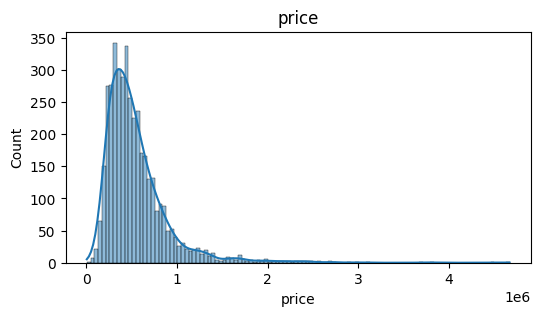

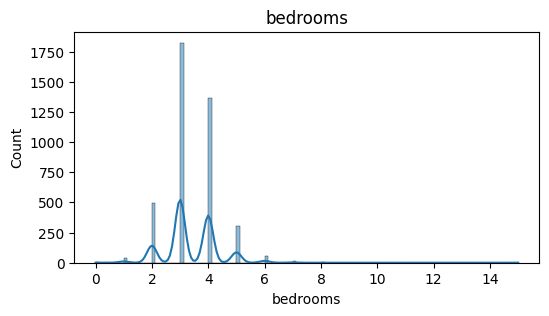

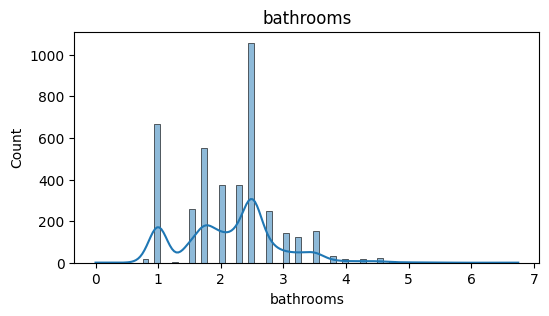

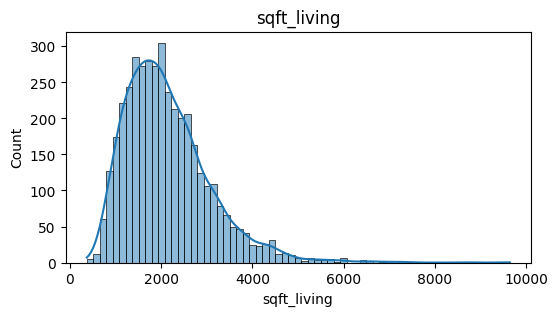

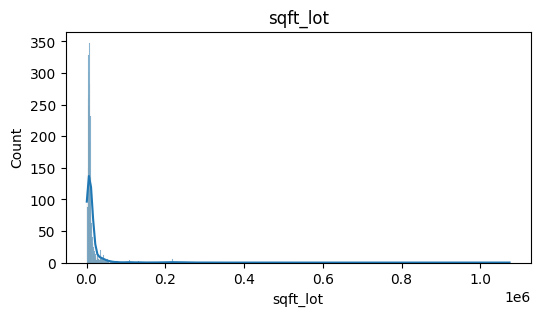

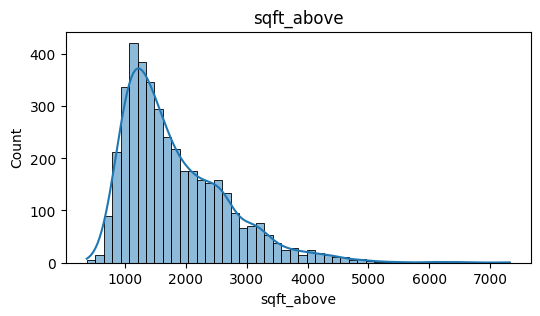

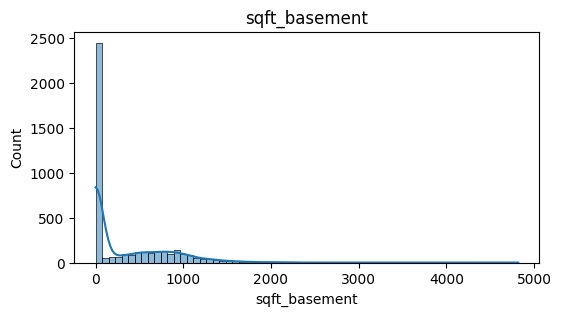

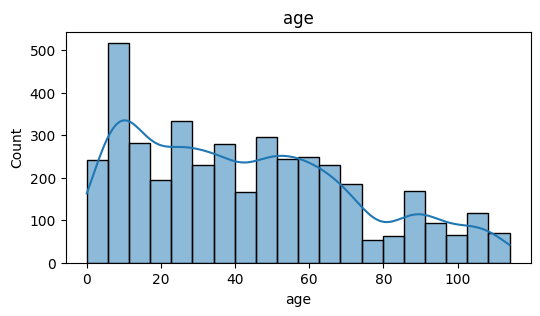

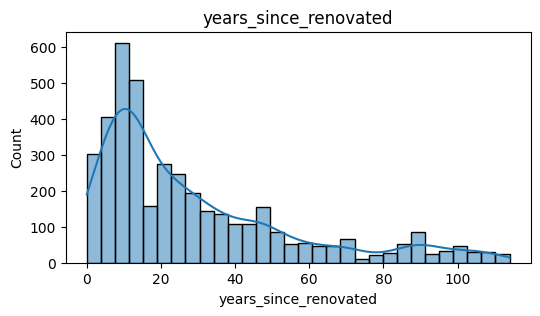

In [ ]:
num_cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_above','sqft_basement','age','years_since_renovated']
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


# Preparation

In [ ]:
x,y = df.drop(['price'],axis=1),df['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = SEED_VALUE)
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.25,random_state = SEED_VALUE)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(2451, 17) (2451,)
(817, 17) (817,)
(818, 17) (818,)


In [ ]:
num_cols = []
cat_cols = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat_cols.append(i)
    elif "int" in str(df[i].dtype) or "float" in str(df[i].dtype):
        num_cols.append(i)

print(num_cols)
print(cat_cols)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'sqft_above', 'sqft_basement', 'city_encoded', 'zip_code_encoded', 'age', 'years_since_renovated']
[]


In [ ]:
num_cols.remove('price')

In [ ]:
df[df.select_dtypes(['bool']).columns] = df.select_dtypes(['bool']).astype(int)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
0,376000.0,3.0,2.00,1340,1384,3.0,0,3,1340,0,0,0,0,1,577681.231120,590451.829241,6,6
1,800000.0,4.0,3.25,3540,159430,2.0,0,3,3540,0,0,0,0,1,530085.722222,530085.722222,7,7
2,2238888.0,5.0,6.50,7270,130017,2.0,0,3,6420,850,0,0,0,1,599950.091221,620139.192412,4,4
3,324000.0,3.0,2.25,998,904,2.0,0,3,798,200,0,0,0,1,577681.231120,563289.943463,7,7
4,549900.0,5.0,2.75,3060,7015,1.0,0,5,1600,1460,0,0,0,1,577681.231120,365625.346405,35,35


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 4139
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  4086 non-null   float64
 1   bedrooms               4086 non-null   float64
 2   bathrooms              4086 non-null   float64
 3   sqft_living            4086 non-null   int64  
 4   sqft_lot               4086 non-null   int64  
 5   floors                 4086 non-null   float64
 6   waterfront             4086 non-null   int64  
 7   condition              4086 non-null   int64  
 8   sqft_above             4086 non-null   int64  
 9   sqft_basement          4086 non-null   int64  
 10  view_city              4086 non-null   int64  
 11  view_exotic_seaside    4086 non-null   int64  
 12  view_normal_houses     4086 non-null   int64  
 13  view_slums             4086 non-null   int64  
 14  city_encoded           4086 non-null   float64
 15  zip_code_

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,sqft_above,sqft_basement,view_city,view_exotic_seaside,view_normal_houses,view_slums,city_encoded,zip_code_encoded,age,years_since_renovated
count,4.086000e+03,4086.000000,4086.000000,4086.000000,4.086000e+03,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4086.000000,4.086000e+03,4.086000e+03,4086.000000,4086.000000
mean,5.487619e+05,3.396965,2.156082,2134.616985,1.467803e+04,1.514440,0.006608,3.450073,1824.829907,309.787078,0.044298,0.014195,0.013705,0.900881,5.524098e+05,5.524795e+05,43.182330,28.883994
std,3.575511e+05,0.916879,0.776001,941.505736,3.598464e+04,0.534753,0.081030,0.676465,848.230554,461.024372,0.205781,0.118308,0.116279,0.298858,1.870975e+05,2.369295e+05,29.844662,26.873050
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,370.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.964400e+05,2.235473e+05,0.000000,0.000000
25%,3.250469e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,3.000000,1190.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.196590e+05,3.656253e+05,17.000000,9.000000
50%,4.642500e+05,3.000000,2.250000,1980.000000,7.656500e+03,1.500000,0.000000,3.000000,1600.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.776812e+05,5.399027e+05,38.000000,20.000000
75%,6.600000e+05,4.000000,2.500000,2610.000000,1.094100e+04,2.000000,0.000000,4.000000,2303.000000,600.000000,0.000000,0.000000,0.000000,1.000000,6.068818e+05,6.437277e+05,63.000000,40.000000
max,4.668000e+06,15.000000,6.750000,9640.000000,1.074218e+06,3.500000,1.000000,5.000000,7320.000000,4820.000000,1.000000,1.000000,1.000000,1.000000,2.046559e+06,2.046559e+06,114.000000,114.000000


In [ ]:
scaler = RobustScaler()
x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_val[num_cols] = scaler.transform(x_val[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

In [ ]:
scaler_y = RobustScaler()
y_train = scaler_y.fit_transform(pd.DataFrame(y_train))
y_val = scaler_y.transform(pd.DataFrame(y_val))
y_test = scaler_y.transform(pd.DataFrame(y_test))

In [ ]:
x_train = x_train.astype("float32")
x_val   = x_val .astype("float32")
x_test  = x_test.astype("float32")

y_train = y_train.astype("float32")
y_val   = y_val.astype("float32")
y_test  = y_test.astype("float32")

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(100).batch(32)
val_ds   = tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(32)
test_ds  = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

print(train_ds)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 17), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


# ANN Model

In [ ]:
from tensorflow.keras import models, layers, optimizers

model = models.Sequential([
    layers.Dense(512, activation='sigmoid', input_shape=(17,)),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(1, activation='linear')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_361 (Dense)               │ (None, 512)            │         9,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_362 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_363 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_364 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,569 (678.00 KB)

 Trainable params: 173,569 (678.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
              ,loss=tf.keras.losses.Huber(delta=1.0)
              ,metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

We Use Huber loss here since there is a lot of outliers

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True
)

In [ ]:
history = model.fit(train_ds,validation_data=val_ds,epochs = 200,callbacks=[early_stopping])

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.3080 - mean_absolute_error: 0.6335 - root_mean_squared_error: 0.9796 - val_loss: 0.1605 - val_mean_absolute_error: 0.3965 - val_root_mean_squared_error: 0.7018
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1307 - mean_absolute_error: 0.3624 - root_mean_squared_error: 0.6183 - val_loss: 0.1317 - val_mean_absolute_error: 0.3347 - val_root_mean_squared_error: 0.6411
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1136 - mean_absolute_error: 0.3259 - root_mean_squared_error: 0.5798 - val_loss: 0.1336 - val_mean_absolute_error: 0.3577 - val_root_mean_squared_error: 0.6161
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1105 - mean_absolute_error: 0.3209 - root_mean_squared_error: 0.5643 - val_loss: 0.1206 - val_mean_absolute_error: 0.3257 - val_root_mean_squared_error: 0.5895
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1099 - mean_absolute_error: 0.3250 - root_mean_squared_

# Model analysis

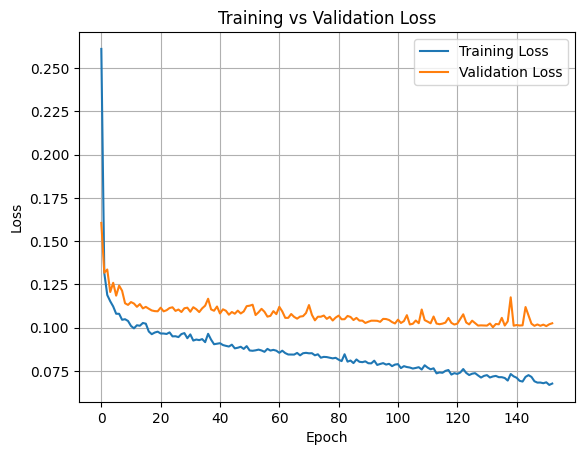

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
min_val_loss = min(history.history['val_loss'])
print("Best Validation Loss:", min_val_loss)

Best Validation Loss: 0.10023053735494614


Model Didnt Overfit and Underfit, Training and Validation loss decreasing overtime. But the loss could be reduced. Solution : Fine Tune

# Fine Tuning Model

In [ ]:
from tensorflow.keras import models, layers, optimizers

modelTuned = models.Sequential([
    layers.Dense(128, input_shape=(17,), activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])


modelTuned.summary()

Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_365 (Dense)               │ (None, 128)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_366 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_367 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_368 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

Modification Reason :
- Turn the neuron to 2^n so GPUs process power of two tensor sizes more efficiently
- Gradually decreasing neurons helps the model learn deeper feature representations
- Sigmoid has vanishing gradient problem, while relu dont
- Dropout to avoid overfitting

In [ ]:
modelTuned.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
              ,loss=tf.keras.losses.Huber(delta=1.0)
              ,metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history = modelTuned.fit(train_ds,validation_data=val_ds,epochs = 200,callbacks=[early_stopping])

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2396 - mean_absolute_error: 0.5290 - root_mean_squared_error: 0.8458 - val_loss: 0.1470 - val_mean_absolute_error: 0.3621 - val_root_mean_squared_error: 0.6372
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1529 - mean_absolute_error: 0.3899 - root_mean_squared_error: 0.6684 - val_loss: 0.1235 - val_mean_absolute_error: 0.3323 - val_root_mean_squared_error: 0.5535
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1417 - mean_absolute_error: 0.3706 - root_mean_squared_error: 0.6527 - val_loss: 0.1245 - val_mean_absolute_error: 0.3293 - val_root_mean_squared_error: 0.5682
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1279 - mean_absolute_error: 0.3489 - root_mean_squared_error: 0.5980 - val_loss: 0.1222 - val_mean_absolute_error: 0.3308 - val_root_mean_squared_error: 0.5543
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1148 - mean_absolute_error: 0.3330 - root_mean_squared_

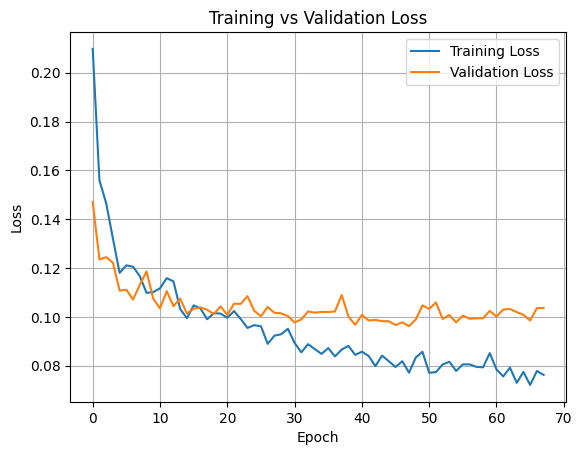

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
min_val_loss = min(history.history['val_loss'])
print("Best Validation Loss:", min_val_loss)

Best Validation Loss: 0.09616906940937042


After a few model tuning operation. Unfortunately, model validation loss didnt decrease that much.

This could be because the data is very noisy having a lot of outliers

# Testing First Model

In [ ]:
import math

y_pred = model.predict(x_test)

y_pred_real = scalerY.inverse_transform(y_pred)
y_test_real = scalerY.inverse_transform(y_test)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
mse_real = mean_squared_error(y_test_real, y_pred_real)

r2 = r2_score(y_test_real, y_pred_real)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
print("R^2 : ", r2)
print("MAE : ", mae_real)
print("RMSE : ", math.sqrt(mse_real))

R^2 :  0.7839565873146057
MAE :  129176.9609375
RMSE :  220331.47740620267


Analysis :
- Model can explain 78,3% of the data variability (R^2 : 78,3). The other 21, 7% is unexplained which could be due to extreme outliers or natural variability in housing price that is hard to predict
- Model prediction deviates about 129,177 on average from the  actual price. Since the house price mean is 548k, then a prediction will be off by roughly 24% (129k/548k)
- Model prediction error are around 220,400 on average, the model will likely to struggle on expensive properties

Overall, The model performs reasonably well but could be better if we handle the outliers properly

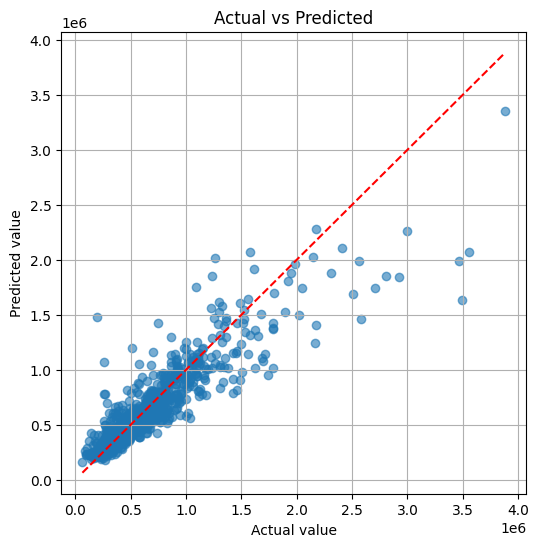

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.6)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


# Testing Second Model

In [ ]:
y_pred = modelTuned.predict(x_test)

y_pred_real = scalerY.inverse_transform(y_pred)
y_test_real = scalerY.inverse_transform(y_test)

mae_real = mean_absolute_error(y_test_real, y_pred_real)
mse_real = mean_squared_error(y_test_real, y_pred_real)

r2 = r2_score(y_test_real, y_pred_real)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
print("R^2 : ", r2)
print("MAE : ", mae_real)
print("RMSE : ", math.sqrt(mse_real))

R^2 :  0.7839565873146057
MAE :  129176.9609375
RMSE :  220331.47740620267


Analysis :
- Model can explain 78,3% of the data variability (R^2 : 78,3). The other 21,7% is unexplained which could be due to extreme outliers or natural variability in housing price that is hard to predict
- Model prediction deviates about 129,176 on average from the  actual price. Since the house price mean is 548k, then a prediction will be off by roughly 24% (126k/548k)
- Model prediction error are around 220,331 on average, the model will likely to struggle on expensive properties

Overall, The model perform well although there isnt much improvement from the other model. This might be because the data has too many outliers

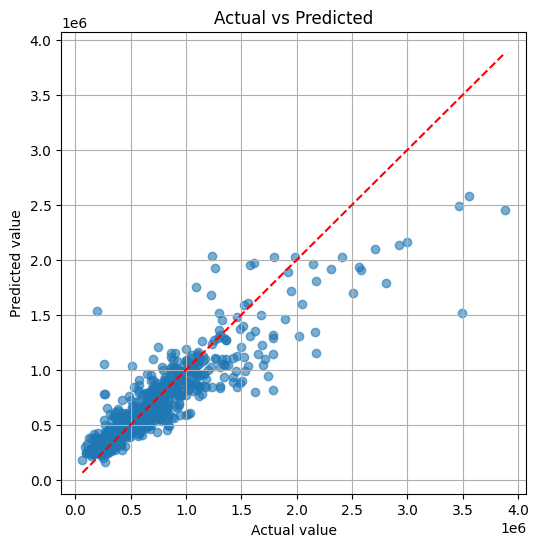

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_real, y_pred_real, alpha=0.6)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()


# Conclusion

- When the dataset contains too many extreme outliers, fine tuning model might not do a significant improvement. Therefore, having clean and high quality data is essential for better model performance

- Looking from high RMSE (\~220k) and MAE (\~129k), the model struggles to predict very expensive house. This could because of extreme outliers and very small number of high priced house